<a href="https://colab.research.google.com/github/MFaeli/Culvert/blob/main/11012023_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means Clustering**

**Importing the libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


**Importing the dataset**

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('GIS_Column_Edited_UTF_8.csv')

# Define the values you want to keep in column 93
values_to_keep = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '<1', '10+', '99']

# Apply the filters
filtered_df = df[
    (df.iloc[:, 11] == 'Round') &
    (df.iloc[:, 93].isin(values_to_keep)) &
    (df.iloc[:, 19] != 0) & (df.iloc[:, 19].notna()) &
    (df.iloc[:, 19] <= 1000) &
    (df.iloc[:, 20] != 0) & (df.iloc[:, 20].notna()) &
    (df.iloc[:, 20] <= 50) &
    (df.iloc[:, 41].notna()) &
    (df.iloc[:, 43].notna()) &
    (df.iloc[:, 13] != 0) & (df.iloc[:, 13].notna()) &
    (df.iloc[:, 13] <= 130)
]

# Get the number of rows in the filtered DataFrame
num_rows = filtered_df.shape[0]
print("Number of rows in the filtered DataFrame:", num_rows)

# Get the relevant columns for X
X = filtered_df.iloc[:, [19, 20]].values





Number of rows in the filtered DataFrame: 7813


<ipython-input-4-dd31e926202d>:4: DtypeWarning: Columns (1,39,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('GIS_Column_Edited_UTF_8.csv')


In [5]:
num_rows = filtered_df.shape[0]
print("Number of rows in the filtered DataFrame:", num_rows)


Number of rows in the filtered DataFrame: 7813


In [6]:
# Count non-zero, non-empty cases in column 93 after filtering
non_zero_non_empty_count_col93 = filtered_df.iloc[:, 93].count()

# Print the count
print(f"Number of non-zero, non-empty cases in column 93 after filtering: {non_zero_non_empty_count_col93}")


Number of non-zero, non-empty cases in column 93 after filtering: 7813


In [7]:
print(X)

[[260.   4.]
 [ 68.   4.]
 [ 55.   4.]
 ...
 [154.  25.]
 [154.  25.]
 [200.   4.]]


**Using the elbow method to find the optimal number of clusters**

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init = "k-means++", n_init=10, random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


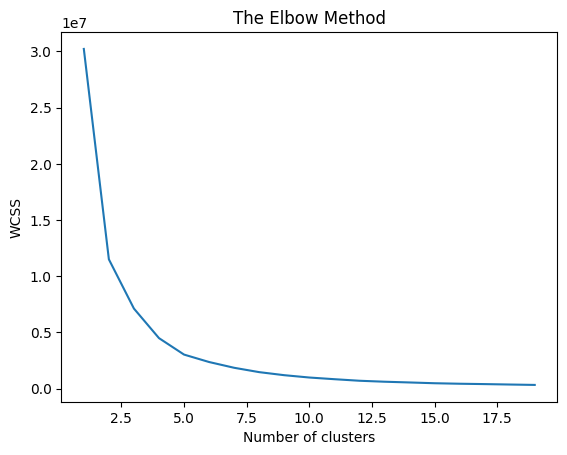

In [9]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Training K-Means Model on the dataset**

In [10]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", n_init=10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [11]:
print(y_kmeans)

[1 0 0 ... 2 2 2]


**Visualizing the Clusters**

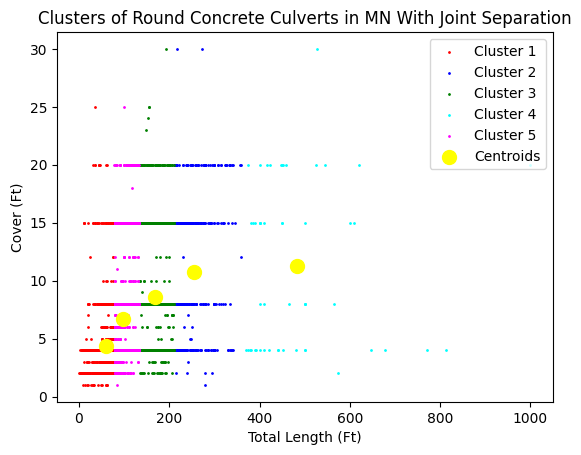

In [20]:
plt.scatter(X[y_kmeans== 0, 0], X[y_kmeans== 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans== 1, 0], X[y_kmeans== 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans== 2, 0], X[y_kmeans== 2, 1], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans== 3, 0], X[y_kmeans== 3, 1], s = 1, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans== 4, 1], s = 1, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = "yellow", label = 'Centroids')
plt.title('Clusters of Round Concrete Culverts in MN With Joint Separation')
plt.xlabel('Total Length (Ft)')
plt.ylabel('Cover (Ft)')
plt.legend()
plt.show()

In [13]:
# Given clustering
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Define a color map for clusters
color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'cyan',
    4: 'magenta'
}

# Define a label map for clusters
label_map = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5'
}

# Displaying the coordinates of each centroid
for i, (x, y) in enumerate(kmeans.cluster_centers_):
    print(f"{label_map[i]} (Color: {color_map[i]}): X: {x:.2f}, Y: {y:.2f}")









Cluster 1 (Color: red): X: 59.05, Y: 4.38
Cluster 2 (Color: blue): X: 253.98, Y: 10.74
Cluster 3 (Color: green): X: 167.58, Y: 8.58
Cluster 4 (Color: cyan): X: 483.94, Y: 11.23
Cluster 5 (Color: magenta): X: 98.10, Y: 6.72


In [14]:
from sklearn.cluster import KMeans
from collections import Counter

# Given clustering
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Define a color map for clusters
color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'cyan',
    4: 'magenta'
}

# Count data points in each cluster
cluster_counts = Counter(y_kmeans)

# Displaying the count and color for each cluster
for cluster, count in cluster_counts.items():
    print(f"{cluster}: {count} data points (Color: {color_map[cluster]})")


1: 375 data points (Color: blue)
0: 3895 data points (Color: red)
4: 2582 data points (Color: magenta)
2: 909 data points (Color: green)
3: 52 data points (Color: cyan)


plot the cases just in blue cluster


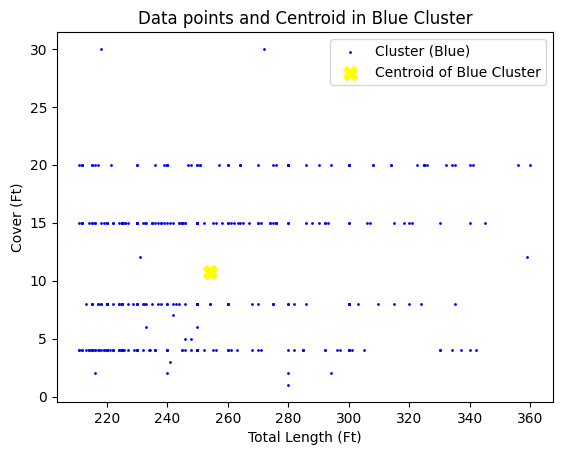

In [15]:
import matplotlib.pyplot as plt

# Scatter plot for Cluster 1 (blue cluster) data points
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 1, c = 'blue', label = 'Cluster (Blue)')

# Scatter plot for the centroid of Cluster 1 (blue cluster)
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], s = 100, c = "yellow", marker="X", label = 'Centroid of Blue Cluster')

plt.title('Data points and Centroid in Blue Cluster')
plt.xlabel('Total Length (Ft)')
plt.ylabel('Cover (Ft)')
plt.legend()
plt.show()



In [16]:
# Count the number of cases in Cluster 1 (blue cluster)
blue_cluster_count = (y_kmeans == 1).sum()

print(f"There are {blue_cluster_count} cases in the blue cluster.")


There are 375 cases in the blue cluster.


**plot the cases just in magenta cluster and its centroid**

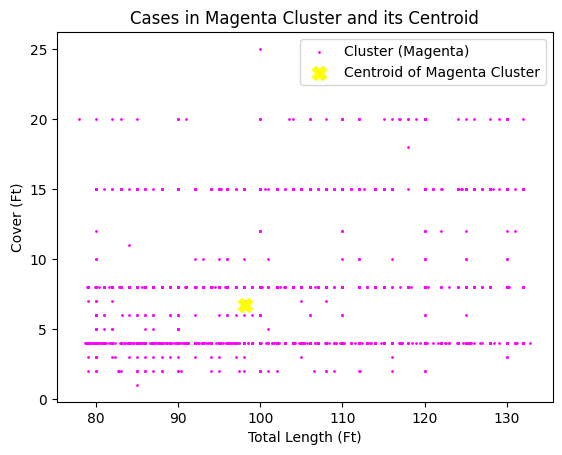

In [17]:
import matplotlib.pyplot as plt

# Plotting the data points in the magenta cluster
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 1, c = 'magenta', label = 'Cluster (Magenta)')

# Plotting the centroid of the magenta cluster
plt.scatter(kmeans.cluster_centers_[4, 0], kmeans.cluster_centers_[4, 1], s = 100, c = "yellow", marker='X', label = 'Centroid of Magenta Cluster')

plt.title('Cases in Magenta Cluster and its Centroid')
plt.xlabel('Total Length (Ft)')
plt.ylabel('Cover (Ft)')
plt.legend()
plt.show()


In [18]:
# Counting the number of cases in the magenta cluster
magenta_cluster_count = sum(y_kmeans == 4)

print(f"There are {magenta_cluster_count} cases in the magenta cluster.")


There are 2582 cases in the magenta cluster.


**Max and Min**

In [19]:
from collections import Counter

# Existing code...

# Count occurrences of each unique value in Cover and Total Length columns
cover_counts = Counter(X[:, 1])
total_length_counts = Counter(X[:, 0])

# Find top 10 most common Cover values
most_common_covers = cover_counts.most_common(10)
least_common_covers = cover_counts.most_common()[:-11:-1]

# Find top 10 most common Total Length values
most_common_total_lengths = total_length_counts.most_common(10)
least_common_total_lengths = total_length_counts.most_common()[:-11:-1]

# Print the results for Cover
print("Top 10 'Cover' values with most data cases:")
for cover, count in most_common_covers:
    print(f"'Cover': {cover} (Ft) with {count} cases.")
print("\nTop 10 'Cover' values with least data cases:")
for cover, count in least_common_covers:
    print(f"'Cover': {cover} (Ft) with {count} cases.")

# Print the results for Total Length
print("\nTop 10 'Total Length' values with most data cases:")
for length, count in most_common_total_lengths:
    print(f"'Total Length': {length} (Ft) with {count} cases.")
print("\nTop 10 'Total Length' values with least data cases:")
for length, count in least_common_total_lengths:
    print(f"'Total Length': {length} (Ft) with {count} cases.")






Top 10 'Cover' values with most data cases:
'Cover': 4.0 (Ft) with 5025 cases.
'Cover': 8.0 (Ft) with 1233 cases.
'Cover': 15.0 (Ft) with 657 cases.
'Cover': 2.0 (Ft) with 325 cases.
'Cover': 20.0 (Ft) with 204 cases.
'Cover': 6.0 (Ft) with 112 cases.
'Cover': 3.0 (Ft) with 103 cases.
'Cover': 5.0 (Ft) with 47 cases.
'Cover': 10.0 (Ft) with 33 cases.
'Cover': 12.0 (Ft) with 23 cases.

Top 10 'Cover' values with least data cases:
'Cover': 18.0 (Ft) with 1 cases.
'Cover': 11.0 (Ft) with 1 cases.
'Cover': 23.0 (Ft) with 1 cases.
'Cover': 9.0 (Ft) with 1 cases.
'Cover': 24.0 (Ft) with 1 cases.
'Cover': 30.0 (Ft) with 4 cases.
'Cover': 25.0 (Ft) with 4 cases.
'Cover': 7.0 (Ft) with 19 cases.
'Cover': 1.0 (Ft) with 19 cases.
'Cover': 12.0 (Ft) with 23 cases.

Top 10 'Total Length' values with most data cases:
'Total Length': 60.0 (Ft) with 493 cases.
'Total Length': 75.0 (Ft) with 309 cases.
'Total Length': 100.0 (Ft) with 254 cases.
'Total Length': 50.0 (Ft) with 253 cases.
'Total Length': 